In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import joblib

import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset = pd.read_csv('../Dataset/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.shape

(30, 2)

In [6]:
#Checking for null values
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
#Splitting the data
X = dataset[['YearsExperience']].values
y = dataset[['Salary']].values

In [8]:
X.shape, y.shape

((30, 1), (30, 1))

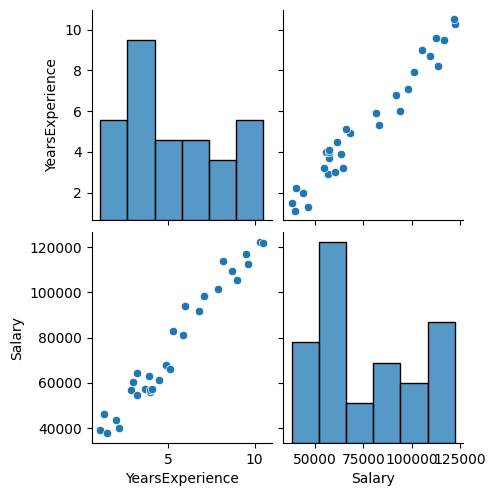

In [9]:
#plotting
sns.pairplot(dataset)

In [10]:
#Checking correlations
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

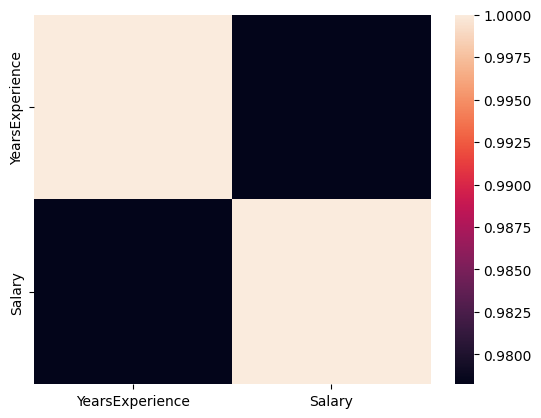

In [11]:
#Plotting the correaltion
sns.heatmap(dataset.corr())

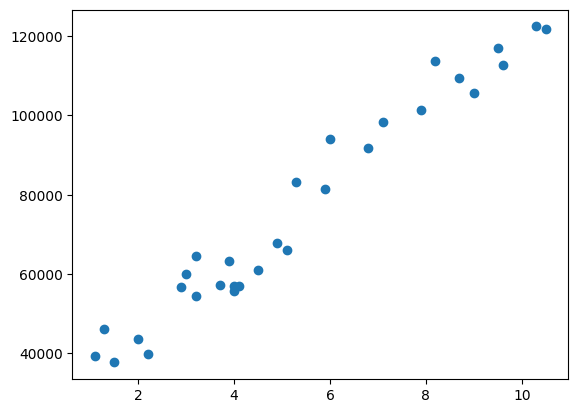

In [12]:
plt.scatter(X,y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [14]:
X_train.shape, X_test.shape

((24, 1), (6, 1))

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
pred = lr.predict(X_test)

In [18]:
pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [19]:
score = r2_score(y_test, pred)
print(f"Accuracy: {(score*100).round(2)} %")

Accuracy: 98.82 %


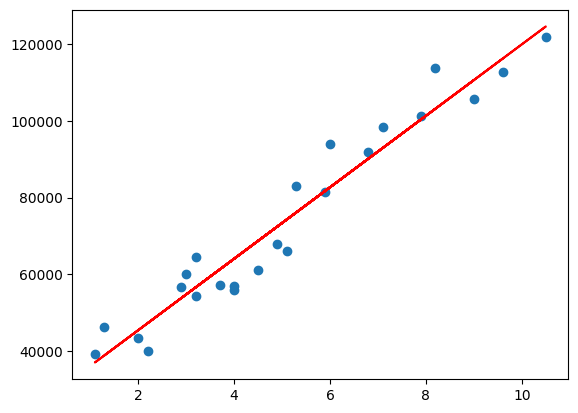

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train, lr.predict(X_train), color='red')

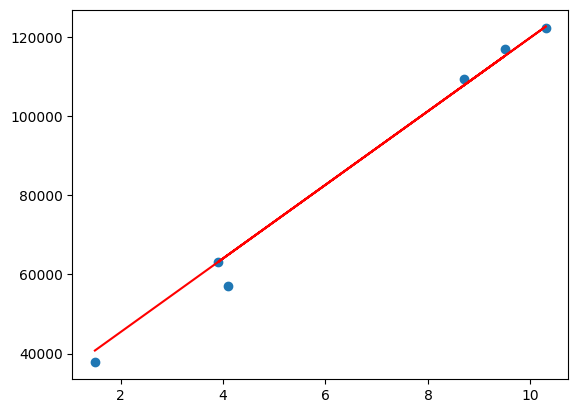

In [21]:
plt.scatter(X_test,y_test)
plt.plot(X_test, lr.predict(X_test), color='red')

In [22]:
joblib.dump(lr, "model.pkl")

['model.pkl']